Построить 5 графиков по выбранным данным.

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек.

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [1]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [6]:
movies_final = movies[['id', 'title', 'vote_average', 'vote_count', 'runtime', 'revenue', 'release_date', 'popularity', 'original_language', 'budget']]
movies_final.head()

,id,title,vote_average,vote_count,runtime,revenue,release_date,popularity,original_language,budget
0,19995,Avatar,7.2,11800,162.0,2787965087,2009-12-10,150.437577,en,237000000
1,285,Pirates of the Caribbean: At World's End,6.9,4500,169.0,961000000,2007-05-19,139.082615,en,300000000
2,206647,Spectre,6.3,4466,148.0,880674609,2015-10-26,107.376788,en,245000000
3,49026,The Dark Knight Rises,7.6,9106,165.0,1084939099,2012-07-16,112.312950,en,250000000
4,49529,John Carter,6.1,2124,132.0,284139100,2012-03-07,43.926995,en,260000000


Устанавливаем корреляцию между средней оценкой и прибылью. Для анализа корреляции лучше всего подходит точечная диаграмма

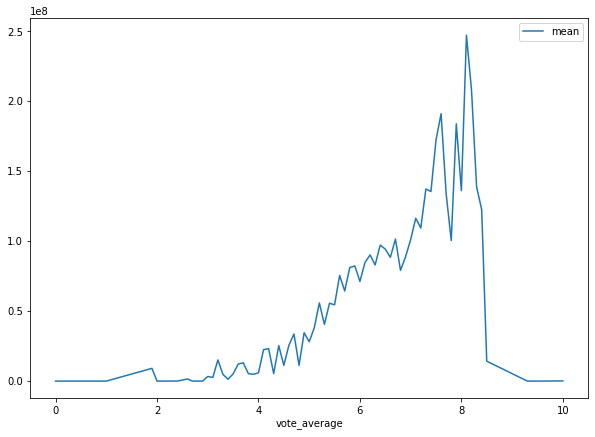

In [19]:
movies_final.groupby('vote_average').agg(['mean'])['revenue'].plot()

In [49]:
movies_final['release_date'] = movies_final.release_date.astype('datetime64')

In [48]:
movies_final['years_release']=movies_final.release_date.dt.year

In [50]:
movies_final['years_release'].head()

0    2009.0
1    2007.0
2    2015.0
3    2012.0
4    2012.0
Name: years_release, dtype: float64

Сравним количество фильмов выпускаемых по годам, для подтверждения гипотезы, что выпуск фильмов растёт из года в год

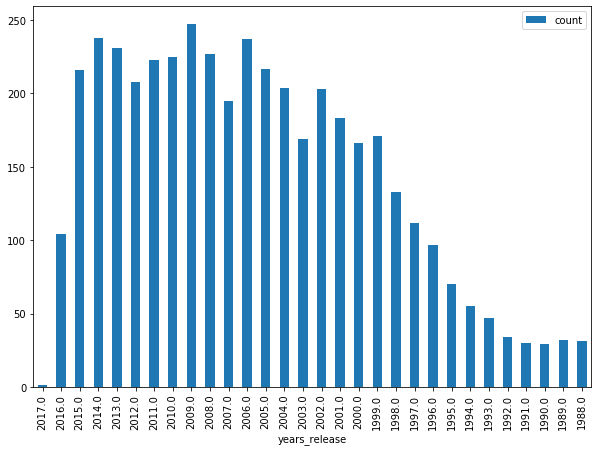

In [58]:
movies_final.groupby('years_release').agg(['count'])['id'].sort_values('years_release', ascending=False).head(30).plot(kind='bar')

Рассмотрим распределение фильмов последних 5 лет по годам в зависимости от оценки. Увидим в каких годах были сняты наиболее успешные фильмы

In [101]:
graph3 = movies_final.loc[(movies_final.years_release > 2010) & (movies_final.years_release < 2016)].groupby(['years_release','vote_average']).agg(['count'])['id']

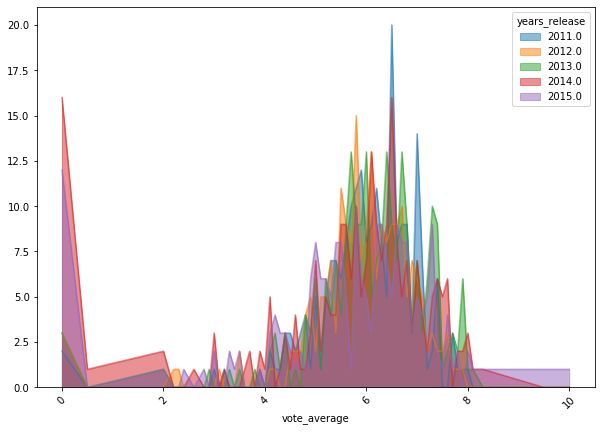

In [104]:
graph3.pivot_table(index = 'vote_average', columns = 'years_release', values = 'count', aggfunc = 'sum').plot(kind='area', rot=45, stacked=False)

In [105]:
movies_final['profit'] = movies_final['revenue'] - movies_final['budget']

In [109]:
movies_final.loc[movies_final.profit<0].head()

,id,title,vote_average,vote_count,runtime,revenue,release_date,popularity,original_language,budget,years_release,profit
13,57201,The Lone Ranger,5.9,2311,149.0,89289910,2013-07-03,49.046956,en,255000000,2013.0,-165710090
73,2698,Evan Almighty,5.3,1151,96.0,173000000,2007-06-09,27.082182,en,175000000,2007.0,-2000000
83,79698,The Lovers,4.8,34,109.0,0,2015-02-13,2.418535,en,27000000,2015.0,-27000000
84,64686,47 Ronin,5.9,1326,119.0,150962475,2013-12-06,41.796339,en,175000000,2013.0,-24037525
135,7978,The Wolfman,5.5,549,102.0,0,2010-02-11,21.214571,en,150000000,2010.0,-150000000


In [110]:
import seaborn as sns

Проверим гипотезу о нормальном распределении оценок фильмов

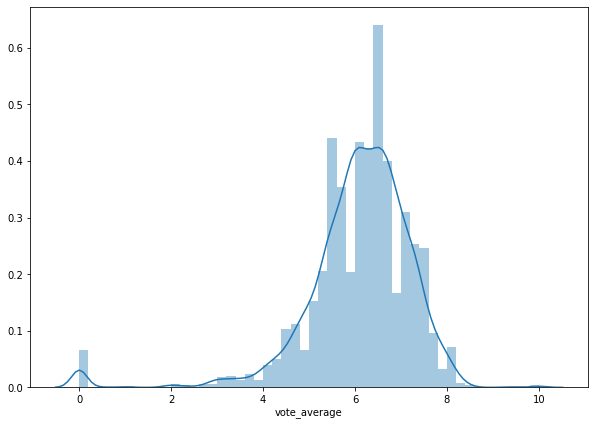

In [112]:
sns.distplot(movies_final.vote_average)

Посмотрим в каких годах получали в среднем наибольшую прибыль с фильмов 

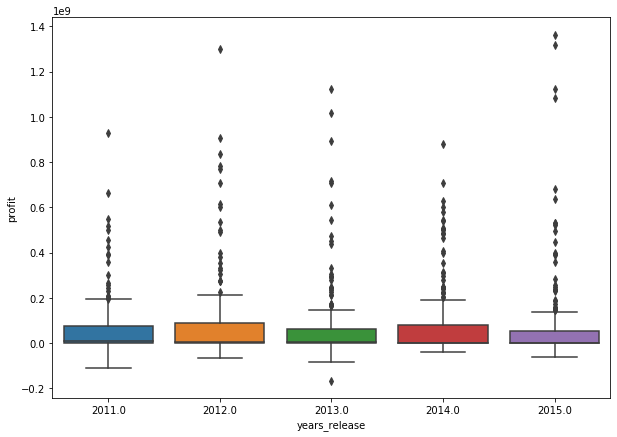

In [152]:
last_movies = sorted(last_movies, reverse=True)[2:7]
ax = sns.boxplot(x="years_release", y="profit", 
            data=movies_final[movies_final.years_release.isin(last_movies)])